# Domácí úkol SPI - 1. úloha
vypracoval David Pokorný (pokord11)
## načtení vstupů, import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.stats
from scipy.stats import chi2
import networkx as nx

K = 13
L = 7
X = ((K*L*23) % (20)) + 1
Y = ((X + ((K*5 + L*7) % (19))) % (20)) + 1
Xstr = '{:03d}'.format(X) + ".txt"
Ystr = '{:03d}'.format(Y) + ".txt"
print("Datový soubor:\nX =", Xstr , "\nY =", Ystr )

Xdata = open(Xstr, "r").read().replace(chr(10),chr(32))
Ydata = open(Ystr, "r").read().replace(chr(10),chr(32))

XdataSlova = Xdata.split()
YdataSlova = Ydata.split()

XdataPismena = list( Xdata.replace(" ", "").replace(",", "") )
YdataPismena = list( Ydata.replace(" ", "").replace(",", "") )

XdataZnaky = list( Xdata )
YdataZnaky = list( Ydata )

Datový soubor:
X = 014.txt 
Y = 015.txt


### (1b) Z jednoho datového souboru načtěte text k analýze. Odhadněte pravděpodobnosti písmen (včetně mezer), které se v textu vyskytují. Takto získané empirické rozdělení graficky znázorněte. Pro další body předpokládejme, že je text vygenerován z homogenního markovského řetězce s diskrétním časem.

Počet symbolů: 32
Symbol      ASCII Code    Četnost    Pravděpodobnost výskytu
--------  ------------  ---------  -------------------------
                    32       1147                0.182469
,                   44          1                0.000159084
A                   65          1                0.000159084
C                   67          2                0.000318167
D                   68          1                0.000159084
T                   84          2                0.000318167
a                   97        426                0.0677696
b                   98         79                0.0125676
c                   99        122                0.0194082
d                  100        236                0.0375437
e                  101        656                0.104359
f                  102        135                0.0214763
g                  103         98                0.0155902
h                  104        338                0.0537703
i                  105    

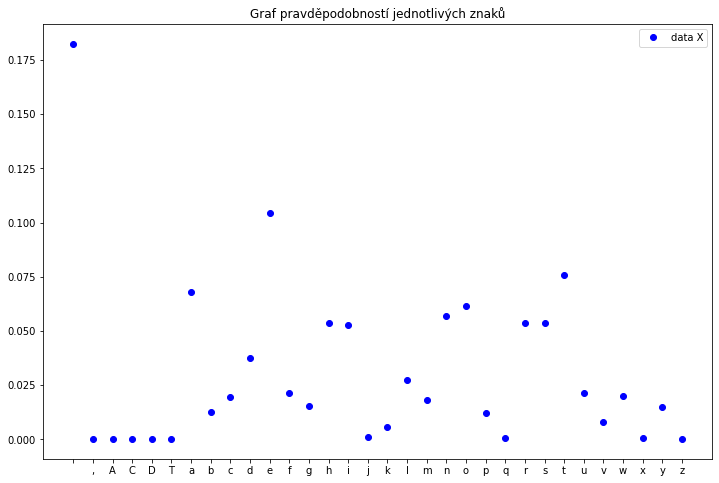

In [23]:
symbols = np.array([chr(x) for x in range(128)])

nZnaky = np.array([ord(x) for x in XdataZnaky])
counts = np.bincount( nZnaky, minlength=128 )
pst = counts/len(XdataZnaky)

nenulove = counts != 0
print("Počet symbolů:", len(counts[nenulove]))

tit = ["Symbol", "ASCII Code", "Četnost", "Pravděpodobnost výskytu"]
table = np.array([symbols[nenulove], np.array(range(128))[nenulove], counts[nenulove], pst[nenulove]]).T
print( tabulate( table ,headers=tit ) )

plt.figure(figsize=(12, 8))
plt.plot(symbols[nenulove], pst[nenulove], "bo")
plt.legend(["data X"])
plt.title("Graf pravděpodobností jednotlivých znaků")
plt.show()

### (1.5b) Za tohoto předpokladu odhadněte matici přechodu. Pro odhad matice přechodu vizte přednášku 17.

Maximálně věrohodným odhadem matice přechodu P je matice $\widehat{P}$ s prvky:

$\widehat{P}_{ij} = \dfrac{n_{ij}}{n_{i\bullet}}$, kde $n_{i\bullet} := \sum_{j\in S}n_{ij}$

$n_{ij}$ je zde četnost přechodů ze znaku $i$ do znaku $j$

In [97]:
n = np.zeros((128,128))

#spočí
for i in range(len(nZnaky)-1):
    n[ nZnaky[i], nZnaky[i+1] ] += 1
    
nsum = np.sum( n, axis=1)

P = np.array([ n[i] / nsum[i] if nsum[i]!=0 else np.zeros(128) for i in range(len(nsum)) ])
P = np.matrix([ x[nenulove] for x in P[nenulove] ]) #odřezu znaky, které se nevyskytují
print("kontrola sumy řádků:", np.sum(P, axis=1).T)

np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=2)
#print(np.matrix(P))


kontrola sumy řádků: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]]


Matici $\widehat{P}$ nevypisuji, protože je příliš velká pro hezký formát.

### (2b) Na základě matice z předchozího bodu najděte stacionární rozdělení tohoto řetězce.
hledám $\pi$, které splnuje rovnici $\pi = \pi \cdot P $. To lze převést na problém hledání vlastního číslo, které má charakterstické vlastní číslo jedna. K tomuto využiji funkce numpy. Nakonec uvěřím rovnici výše prostým vynásobením.

1 - rovnici převedu na $\pi^T = P^T \cdot \pi^T$

2 - získám vlastní vektory $u_i$ s vlastními čísly $\lambda_i$

3 - vezmu největší vlastní vektor (lambdy jsou normované, proto bude mít $\lambda = 1$)

4 - znormuji $\pi$, tak aby suma prvků byla rovna jedné

5 - zkontroluji $\pi = \pi \cdot P => \pi - (\pi \cdot P) = 0$

In [100]:
PT = P.T
l, u = np.linalg.eig(PT)

lr = np.real(l)
ind = np.where(lr > 0.99)
pi = np.real(u[:, ind[0]])
pi /= np.sum(pi.T)
pi = np.ravel(pi)
print("stacionarni rozdeleni:", pi)

stacionarni rozdeleni: [ 1.82e-01  1.60e-04 -0.00e+00  3.18e-04  1.59e-04  3.18e-04  6.78e-02
  1.26e-02  1.94e-02  3.76e-02  1.04e-01  2.15e-02  1.56e-02  5.38e-02
  5.27e-02  1.11e-03  5.73e-03  2.74e-02  1.80e-02  5.68e-02  6.17e-02
  1.21e-02  6.36e-04  5.35e-02  5.36e-02  7.59e-02  2.12e-02  7.96e-03
  2.00e-02  6.37e-04  1.48e-02  3.18e-04]


In [66]:
# kontrola:
pi - (pi * P)

matrix([[ 2.78e-17, -1.57e-18, -0.00e+00,  2.17e-19,  0.00e+00,
         -1.08e-19, -1.39e-17, -6.94e-18,  1.04e-17,  1.39e-17,
          4.16e-17,  3.47e-18,  2.60e-17, -3.47e-17, -4.16e-17,
          2.17e-19,  8.67e-19, -6.94e-18,  3.47e-18, -2.08e-17,
         -2.08e-17, -6.94e-18,  3.25e-19, -1.39e-17,  0.00e+00,
          2.78e-17, -3.47e-18, -5.20e-18,  0.00e+00,  3.25e-19,
         -3.47e-18, -2.17e-19]])

Matice sice není nulová, ale vzhledem k malým hodnotám se jedná o nepřesnost při práci s float64.

### (1.5b) Porovnejte stacionární rozdělení se získaným empirickým rozdělením. Tj. na hladině 5% otestujte hypotézu, že se empirické rozdělení z bodu 1 rovná stacionárnímu rozdělení.

Nejdříve si zobrazím, jak vypadají pravděpodobnosti z empirického rozdělení oproti stacionárnímu.

In [67]:
plt.figure(figsize=(12, 8))
plt.plot(symbols[nenulove], pst[nenulove], "bo")
plt.plot(symbols[nenulove], pi.T, "ro")
plt.legend(["pst v datech", "pst podle stacionarniho rozdeleni"])
plt.title("Graf pravděpodobností jednotlivých znaků")
plt.show()

Pravděpodobnosti vypadají zcela stejně. Přesto provedeme formální test.

K testování volím párový t-test (z každého rozdělení mám ke každému symbolu jedno měření). Mám tedy $X = (X_{empirické}, X_{stacionarni})$

Budu testovat náhodnou proměnnou $Z = X_{empirické} - X_{stacionarni}$ na nulovou střední hodnotu, neboli

$H_0: \mu_Z = 0$, oproti $H_a:\mu_Z \neq 0$

Testová statistika T:
$$T=\cfrac{\overline{Z}_n}{s_Z}\sqrt{n}$$

In [92]:
z = (pst[nenulove] - pi)
T = z.mean() * np.sqrt(len(z)) / z.std()
print("T = ", T)

T =  6.27014310277056e-13


Oboustraným kritickým oborem této statistiky je $|T| \geq t_{\alpha/2,n-1}$.

Kritická hodnota pro $\alpha$ = 0.05 a $n=32$ rovno:

In [94]:
from scipy.stats import t
critical = t.isf(0.025,31)
print(critical)

2.039513446396408


Jelikož naše testovací statistika není v kritickém oboru, pak hypotézu, že původní rozdělení není stejné jako stacionární, nezamítáme.